
<h1> Math 4544 Numerical Analysis Lab</h1>
<h2> Lab 03 <h2>

The Objectives of this weeks lab is to implement and understand different methods of Interpolation. 
<br>

In the mathematical field of numerical analysis, interpolation is a type of estimation, a method of constructing new data points within the range of a discrete set of known data points.

In engineering and science, one often has a number of data points, obtained by sampling or experimentation, which represent the values of a function for a limited number of values of the independent variable. It is often required to interpolate, i.e., estimate the value of that function for an intermediate value of the independent variable. A closely related problem is the approximation of a complicated function by a simple function. Suppose the formula for some given function is known, but too complicated to evaluate efficiently. A few data points from the original function can be interpolated to produce a simpler function which is still fairly close to the original. The resulting gain in simplicity may outweigh the loss from interpolation error. For more basics of interpolation check interpolation on  [Wikipedia](https://en.wikipedia.org/wiki/Interpolation) 
 

At the successful completion of this lab you should be able to implement different methods of linear and non linear interpolation. 



Go to  [matplotlib.pyplot tutorials](https://matplotlib.org/gallery/index.html#pyplot) for all kinds of help regarding plot. For interpolation lectures, you can have a look at the class [lecture.](http://mathforcollege.com/nm/mws/gen/05inp/mws_gen_inp_txt_lagrange.pdf) 


## Task 01: Implementing $n^{th}$ order lagrangian interpolation ##
The upward velocity of a rocket is given in the following table. 

| t (s) |  v(t) (m/s) |
| --- | --- | 
| 0 | 0 | 
| 10 | 227.04 | 
| 15 | 362.78 | 
| 20 | 517.35 | 
| 22.5 | 602.97 | 
| 30 | 901.67 | 
| 32.5 | 1010.27 | 
| 37 | 1125 | 
| 40 | 1175 | 
| 42 | 1205 | 
| 45 | 1230 | 
| 49 | 1260 | 
| 52 | 1290 | 
| 54 | 1340 | 


*    

*    Determine the value of the velolcity at $t = 27$ using an $ n^{th}$ order lagrangian interpolation. Your solution should take $n$ as an input and should be able to select closest $(n+1)$ points for finding out the lagrangian coeffecients. 

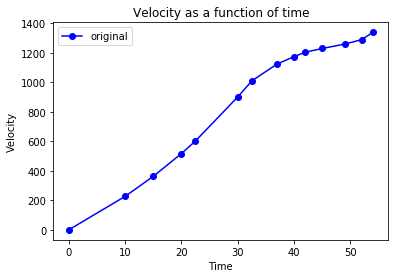

In [10]:
#dataset description
import numpy as np
import matplotlib.pyplot  as plt  
t = np.array([0,10,15,20,22.5,30,32.5,37,40,42,45,49,52,54])
vt = np.array([0,227.04,362.78,517.35,602.97,901.67,1010.27,1125,1175,1205,1230,1260,1290,1340])

plt.plot(t, vt, color='b', marker='o', label='original')
plt.title('Velocity as a function of time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.show()


Take $n$ as an input [Try values like 2, 3, 4] and select closest $(n+1)$ data points from the given data. 

In [0]:
def trimmer__(t_in, vt_in, n, x_in):
    # t_in : time list
    # vt_in: velocity list
    # x_in : value of t at which vt should be calculated
    # output : closest n+1 points to the query
    t_trimmed=[]
    vt_trimmed=[]

    b=int(n/2)
    a=n-b
    flag=0
    
    for i in range(14):
      if x_in<=t_in[i]:
        flag=i
        break
    
    o=flag-a
      
    for j in range(a):
      if (j+o)<0:
        continue
      t_trimmed.append(t_in[j+o])
      vt_trimmed.append(vt_in[j+o])

    
    for j in range(b):
      if (flag+j)>=14:
        break
      t_trimmed.append(t_in[flag+j])
      vt_trimmed.append(vt_in[flag+j])
      
    return t_trimmed, vt_trimmed




In [0]:

def Li(t_trim, vt_trim, x, i):
    # li: ith lagrangian multiplier

    l=len(t_trim)
    under=1
    upper=1
    
    for j in range(l):
      if t_trim[j]==t_trim[i]:
        continue
      upper=upper*(x-t_trim[j])
      if j!=i:
        under=under*(t_trim[i]-t_trim[j])
    
    li=upper/under
  
    return li




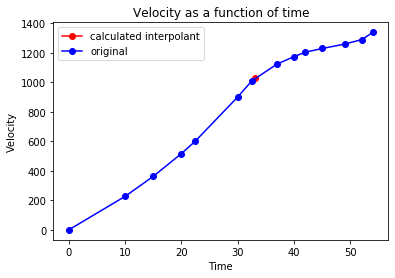

In [37]:
def nth_lagrangian(t, vt, x, n):
    
  
    arr=[]
    t_trim,vt_trim=trimmer__(t, vt, n, x)
    y=0
   
    for i in range(n):
      y=y+Li(t_trim, vt_trim, x, i)*vt_trim[i]
      arr.append(y)

    
    plt.plot(x, y, color='red', marker='o', label='calculated interpolant')
    plt.plot(t, vt, color='b', marker='o', label='original')
    plt.title('Velocity as a function of time')
    plt.xlabel('Time')
    plt.ylabel('Velocity')
    plt.legend()
    plt.show()


nth_lagrangian(t, vt, 33, 6)





### Observations ###

The Lagrange form of the interpolation polynomial shows the linear character of polynomial interpolation and the uniqueness of the interpolation polynomial. Therefore, it is preferred in proofs and theoretical arguments.<br>As can be seen from the construction, each time a node <font color="red"> t_trim</font> changes, all Lagrange basis polynomials have to be recalculated. A better form of the interpolation polynomial for practical purposes is the barycentric form of the Lagrange interpolation